In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from git_root import git_root

In [2]:
# Taken from 
# https://matplotlib.org/stable/gallery/statistics/customized_violin.html#violin-plot-customization
def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')

# Load the data

In [3]:
df = pd.read_csv(Path(git_root()) / "data" / "risotto.csv")
df.head()

,Unnamed: 0,age,nationality,chef_rating,gas_stove,mu,stirring,treatment_effect,payment
0,0,50.77,Indonesia,0.53,1,20.737829,1,0.344297,21.082125
1,1,59.48,Iraq,0.46,0,20.462730,0,0.760332,20.462730
2,2,47.25,India,0.46,0,24.294204,0,0.194722,24.294204
3,3,22.21,Italy,0.58,0,15.903796,1,0.887621,16.791417
4,4,100.40,India,0.58,1,29.951843,1,0.307483,30.259326


In [14]:
print(df.round(decimals=2).head().to_markdown())

|    |   Unnamed: 0 |    age | nationality   |   chef_rating |   gas_stove |    mu |   stirring |   treatment_effect |   payment |
|---:|-------------:|-------:|:--------------|--------------:|------------:|------:|-----------:|-------------------:|----------:|
|  0 |            0 |  50.77 | Indonesia     |          0.53 |           1 | 20.74 |          1 |               0.34 |     21.08 |
|  1 |            1 |  59.48 | Iraq          |          0.46 |           0 | 20.46 |          0 |               0.76 |     20.46 |
|  2 |            2 |  47.25 | India         |          0.46 |           0 | 24.29 |          0 |               0.19 |     24.29 |
|  3 |            3 |  22.21 | Italy         |          0.58 |           0 | 15.9  |          1 |               0.89 |     16.79 |
|  4 |            4 | 100.4  | India         |          0.58 |           1 | 29.95 |          1 |               0.31 |     30.26 |


# Investigate outcome

Text(0.5, 0, 'payment')

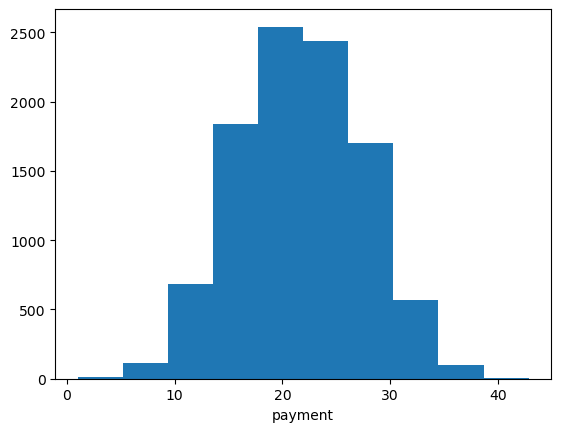

In [4]:
fig, ax = plt.subplots()
ax.hist(df["payment"])
ax.set_xlabel("payment")

Text(0, 0.5, 'payment')

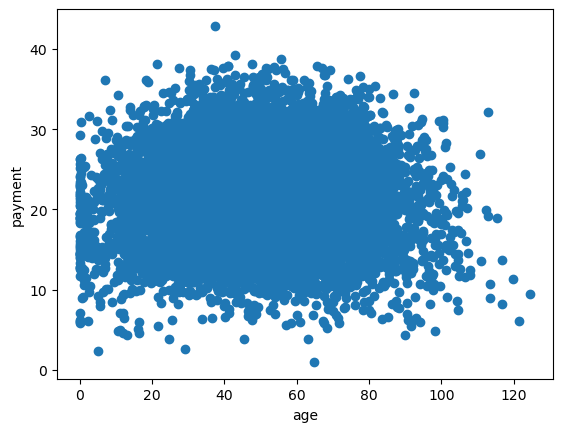

In [5]:
fig, ax = plt.subplots()
ax.scatter(df["age"], df["payment"])
ax.set_xlabel("age")
ax.set_ylabel("payment")

Text(0, 0.5, 'payment')

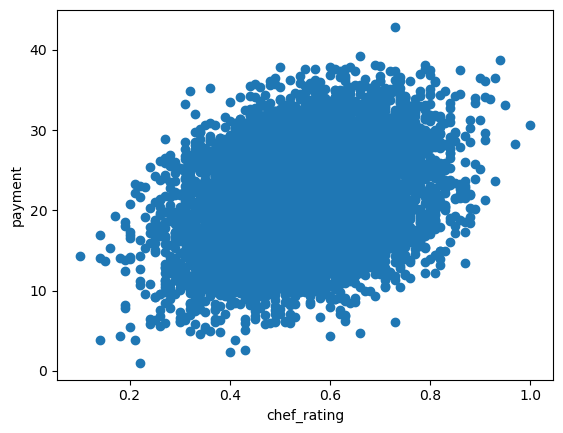

In [6]:
fig, ax = plt.subplots()
ax.scatter(df["chef_rating"], df["payment"])
ax.set_xlabel("chef_rating")
ax.set_ylabel("payment")

Text(0, 0.5, 'payment')

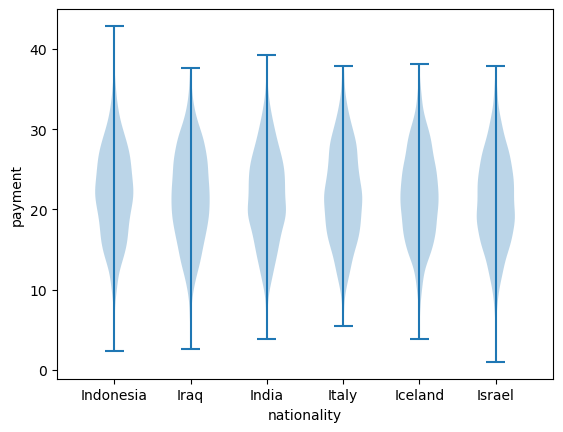

In [7]:
nationalities = df["nationality"].unique()
data = [
    df[df["nationality"] == nationality]["payment"].values for nationality in nationalities
]

fig, ax = plt.subplots()
ax.violinplot(dataset = data)
set_axis_style(ax, nationalities)
ax.set_xlabel("nationality")
ax.set_ylabel("payment")

Text(0, 0.5, 'payment')

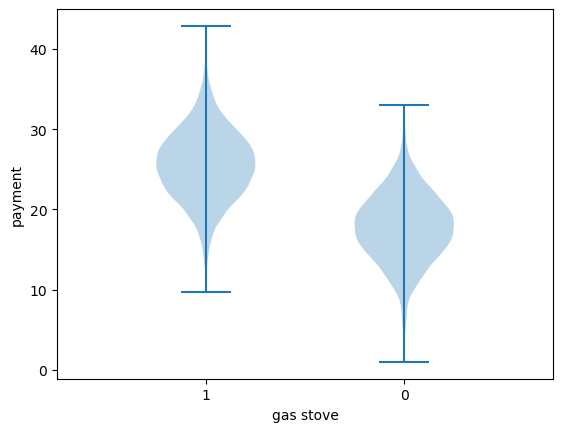

In [8]:
gas_stoves = df["gas_stove"].unique()
data = [
    df[df["gas_stove"] == gas_stove]["payment"].values for gas_stove in gas_stoves
]

fig, ax = plt.subplots()
ax.violinplot(dataset = data)
set_axis_style(ax, gas_stoves)
ax.set_xlabel("gas stove")
ax.set_ylabel("payment")

# Investigate treatment assignment

In [9]:
df["stirring"].value_counts()

1    5063
0    4937
Name: stirring, dtype: int64

Text(0, 0.5, 'probability of stirring')

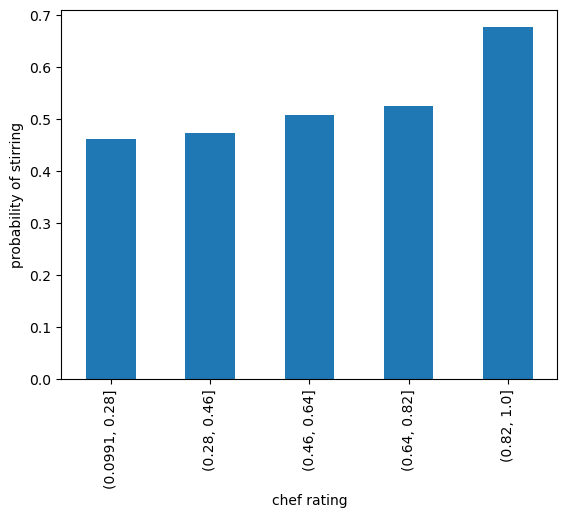

In [10]:
df_bins = df.copy()
df_bins["bin"] = pd.cut(df["chef_rating"], bins=5)
aux = df_bins.groupby("bin")["stirring"].mean()
fig, ax = plt.subplots()
aux.plot.bar(ax=ax)
ax.set_xlabel("chef rating")
ax.set_ylabel("probability of stirring")

# Investigate treatment effect

Text(0.5, 0, 'treatment effect')

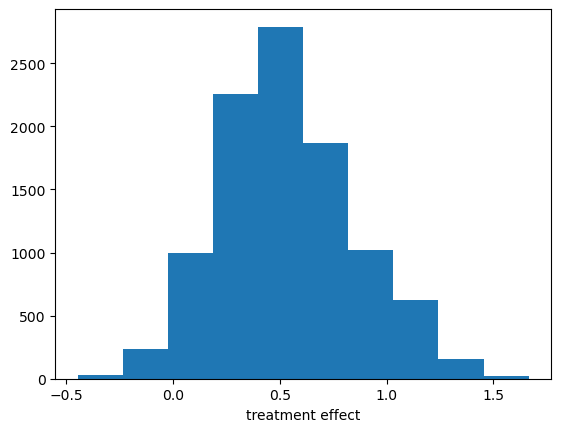

In [11]:
fig, ax = plt.subplots()
ax.hist(df["treatment_effect"])
ax.set_xlabel("treatment effect")